# Medical Image Analysis

**Imports and Drive Mount**

In [1]:
from google.colab import drive
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import logging
logging.getLogger("sklearn").setLevel(logging.ERROR)

import warnings
warnings.filterwarnings('ignore')


drive.mount('/content/drive')

Mounted at /content/drive


**Data Loading**

Data is loaded from the file system and the sample labels are encoded to numerical values using the label encoder.


In [4]:
# Location for the files in google drive
train_url = '/content/drive/My Drive/MIA_JCOMP/datasets/pp5i_train.gr.csv'
test_url = '/content/drive/My Drive/MIA_JCOMP/datasets/pp5i_test.gr.csv'
class_url = '/content/drive/My Drive/MIA_JCOMP/datasets/pp5i_train_class.txt'

# Using pandas we read the csv files
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)
class_df = pd.read_csv(class_url)

# Ndarray is the n-dimensional array object defined in the numpy which stores the collection of the similar type 
# of elements. In other words, we can define a ndarray as the collection of the data type (dtype) objects.
class_np = class_df.to_numpy()

# Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form for the classes
le = preprocessing.LabelEncoder()
le.fit(class_np)

# Now this becomes your class for training data - besically we get a labelled dataset
train_class = le.transform(class_np)


In [6]:
# Classes
class_df

,Class
0,Covid
1,Covid
2,Covid
3,Covid
4,Covid
...,...
64,MERS
65,MERS
66,MERS
67,MERS


In [7]:
# Training data
import pandas as pd
data = pd.read_csv(train_url)
data.head()

,SNO,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,A28102_at,30,46,31,31,26,28,35,29,21,...,35,49,31,51,71,68,77,56,41,38
1,AB000114_at,22,31,19,16,26,24,29,20,23,...,38,30,22,24,19,21,22,25,21,17
2,AB000115_at,29,70,12,11,14,13,14,18,10,...,20,205,16,61,62,35,30,65,32,25
3,AB000220_at,76,208,244,39,85,23,634,159,50,...,55,203,152,53,28,30,31,31,27,16
4,AB000409_at,167,211,179,119,161,166,228,267,260,...,137,180,107,147,170,131,132,158,164,172


**Data Cleaning**

Once loaded and encoded, the SNO column is backedup and is removed from further processing. After which values below 20 and 16000 are clipped to 20 and 16000. 

 Training Data:  
                  SNO    1   2    3    4    5    6   7    8   9  ...   61   62  \
2506       U00921_at   20  20   20   20   20   20  20   20  20  ...   26   20   
6528     U59877_s_at   20  45   20   20   20   20  20   20  20  ...  285  341   
6663   AF000424_s_at   20  20   20   20   20   20  20   20  20  ...   20   20   
5503     D13631_s_at   21  54   20   31   20   20  20   20  20  ...  114  141   
3688       U79242_at   20  20   20   20   32   20  20   20  20  ...   31   20   
...              ...  ...  ..  ...  ...  ...  ...  ..  ...  ..  ...  ...  ...   
6861  X54489_rna1_at   20  20   20   20   20   20  20   20  20  ...   20   20   
1241       L13042_at   50  53   48   42   40   43  61   30  26  ...   41   36   
1658  M14159_cds2_at   48  85  108   27   54   46  24   20  20  ...   82   78   
3355       U56816_at  122  73   79  120  151  119  67  100  40  ...   74  103   
4156       X51757_at   20  20   20   21   20   20  27   20  20  ...   52   20   

       6

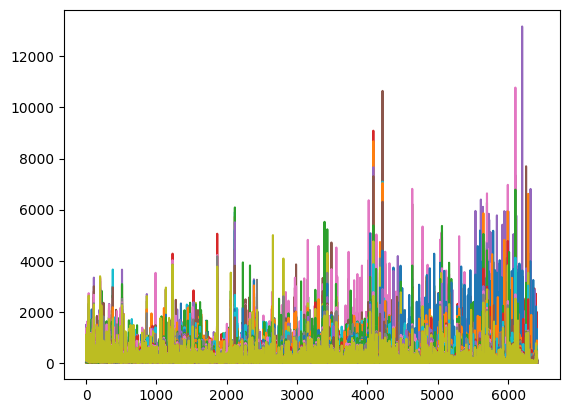

In [12]:
# Saving SNO column before deleting from train and test Data
ttdf_sno=train_df['SNO']
ttdf_rem=train_df.iloc[:,1:]
ttdf_rem=ttdf_rem.clip(20,16000)

tsdf_sno=test_df['SNO']
tsdf_rem=test_df.iloc[:,1:]
tsdf_rem=tsdf_rem.clip(20,16000)


ttdf_cal = ttdf_rem.max(axis=1)/ttdf_rem.min(axis=1)
ttdf_cal = abs(ttdf_cal)
del_ind = ttdf_cal[ttdf_cal<2].index

# Dropping SNO label
train_tdf = pd.concat([ttdf_sno.drop(del_ind),ttdf_rem.drop(del_ind)],axis=1,sort=False)
test_tdf = pd.concat ([tsdf_sno.drop(del_ind),tsdf_rem.drop(del_ind)],axis=1,sort=False)

# Compute the ANOVA F-value - Analysis of Variance (ANOVA) is a statistical formula 
# used to compare variances across the means (or average) of different groups
# Using varience we find rank 
from sklearn.feature_selection import f_classif
tTrain_tdf = train_tdf.T[1:]
new_train = f_classif(tTrain_tdf,train_class)
train_tdf['rank']=new_train[0]
test_tdf['rank']=new_train[0]

# Sorting values in the train and test data using a rank - saving it as train_tdf
train_tdf=train_tdf.sort_values('rank',ascending=False)
test_tdf=test_tdf.sort_values('rank',ascending=False)

print("\033[4m Training Data: \033[0m \n",train_tdf,"\n")
print("\033[4m Testing Data: \033[0m \n",test_tdf,"\n")

training_data = train_tdf.drop('SNO',axis=1)
training_data = training_data.drop('rank',axis=1)
training_data = training_data.to_numpy()

p=plt.plot(training_data)

In [11]:
train_tdf

,SNO,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,rank
2506,U00921_at,20,20,20,20,20,20,20,20,20,...,26,20,44,155,92,118,115,102,119,222.388504
6528,U59877_s_at,20,45,20,20,20,20,20,20,20,...,285,341,381,924,1499,923,1358,1081,1120,166.874021
6663,AF000424_s_at,20,20,20,20,20,20,20,20,20,...,20,20,34,128,63,73,102,94,92,162.284150
5503,D13631_s_at,21,54,20,31,20,20,20,20,20,...,114,141,89,329,365,331,396,314,293,148.242194
3688,U79242_at,20,20,20,20,32,20,20,20,20,...,31,20,20,261,175,153,192,185,121,139.143388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6861,X54489_rna1_at,20,20,20,20,20,20,20,20,20,...,20,20,33,20,20,20,20,20,20,0.102060
1241,L13042_at,50,53,48,42,40,43,61,30,26,...,41,36,34,36,34,48,40,41,30,0.099092
1658,M14159_cds2_at,48,85,108,27,54,46,24,20,20,...,82,78,35,63,56,20,62,48,38,0.092244
3355,U56816_at,122,73,79,120,151,119,67,100,40,...,74,103,88,98,93,114,73,76,103,0.081504


In [ ]:
import numpy as np
from numpy import savetxt
from numpy import genfromtxt

def unique_rows(a):
    order = np.lexsort(a.T)
    a = a[order]
    diff = np.diff(a, axis=0)
    ui = np.ones(len(a), 'bool')
    ui[1:] = (diff != 0).any(axis=1) 
    return a[ui]

NList = [2,4,6,8,10,12,15,20,25,30]

for N in NList:
  x_train = train_tdf.drop('SNO',axis=1)
  x_train = x_train.drop('rank',axis=1)
  x_train = x_train.to_numpy()
  x_train = x_train[:N].T
  x_trainN = np.c_[x_train, train_class]  
  x_trainN=unique_rows(x_trainN)

  filename="pp5i_train.top"+str(N)+".gr.csv"
  savetxt(filename, x_trainN, delimiter=',')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# ML algorithms Gaussian , Decision Tree , KNN , MLP , ExtraTreeClassifier
# Extra trees (short for extremely randomized trees) is an ensemble supervised machine learning method that uses decision trees
CList = ["GaussianNB","DecisionTreeClassifier","KNeighborsClassifier","MLP","ExtraTreesClassifier"]

funcdict = {
  'GaussianNB': GaussianNB,
  'DecisionTreeClassifier': DecisionTreeClassifier,
  'KNeighborsClassifier': KNeighborsClassifier,
  'MLP': MLPClassifier,
  'ExtraTreesClassifier': ExtraTreesClassifier,
}

arr = np.zeros((10,6))
row =0 


for N in NList:
  NRow = list()
  NRow.append(N)

  col =0
  arr[row][col]=N

  filename="pp5i_train.top"+str(N)+".gr.csv"
  data_arr = np.genfromtxt(filename,delimiter=',') 
  x_trainNT = data_arr[:,:-1]
  y_trainNT = data_arr[:,-1]

  for C in funcdict:
    if C=='KNeighborsClassifier':
      clf = funcdict[C](3)
    elif C=='ExtraTreesClassifier':
      clf = funcdict[C](n_estimators=350) #The number of trees in the forest
    elif C=='MLP':  #Multi Layer Perceptron - Relu Activation Function , Stochastic gradient - 
    # very efficient approach to fitting linear classifiers and regressors under convex loss functions
    # 250 iterations

      clf = MLPClassifier(activation = 'relu', solver = 'sgd', hidden_layer_sizes= (25, 25),random_state = 1, max_iter=250)
    else:
      clf = funcdict[C]()
      
    # Clf is an estimator instance, which is used to store model. 
    # We use clf to store trained model values, which are further used to predict value, based on the previously stored weights.
    clf.fit(x_trainNT,y_trainNT)

    from sklearn.model_selection import cross_val_score
    # The cross_val_score() function will be used to perform the evaluation, taking the dataset and 
    # cross-validation configuration and returning a list of scores calculated for each fold.
    scores = cross_val_score(clf, x_trainNT, y_trainNT,cv=5)
    NRow.append(scores.mean())
    col+=1
    arr[row][col]=1-scores.mean()  
  row+=1

In [ ]:
CList = ["GaussianNB","DecisionTreeClassifier","KNeighborsClassifier","MLP","ExtraTreesClassifier"]

models = zip(CList, funcdict)

NMList = list()
for i in arr[:,1:]:
  NMList.append(np.mean(i))

CMList = list()
for i in range(arr.shape[1]-1):
  CMList.append(np.mean(arr[:,i+1]))
  
maxN = min(NMList)
mi=[i for i, j in enumerate(NMList) if j == maxN]
maxNV = NList[mi[0]]

maxC = min(CMList)
mi=[i for i, j in enumerate(CMList) if j == maxC]
maxCV = CList[mi[0]]

filename="pp5i_train.top"+str(maxNV)+".gr.csv"
data_arr = np.genfromtxt(filename,delimiter=',') 
best_genes_set = data_arr[:,:-1]
best_genes_cls = data_arr[:,-1]
filename="pp5i_train.bestN.csv"
savetxt(filename, best_genes_set, delimiter=',')

x_test = test_tdf.drop('SNO',axis=1)
x_test = x_test.drop('rank',axis=1)
x_test = x_test.to_numpy()
x_test = x_test[:maxNV].T
filename="pp5i_test.bestN.csv"
savetxt(filename, x_test, delimiter=',')


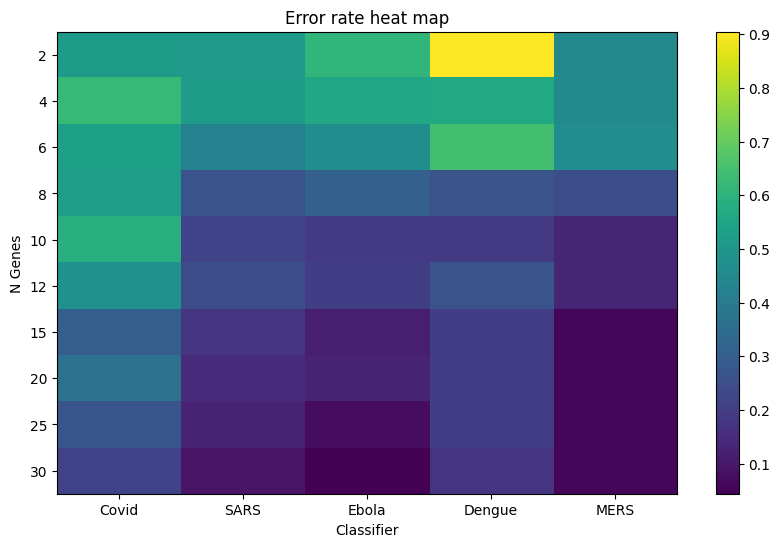

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))

hm=plt.imshow(arr[:,1:],aspect='auto')
cb=plt.colorbar()

xlocs, xlabels=plt.xticks()
ylocs, ylabels=plt.yticks()

new_xlocs=[0,1,2,3,4]
new_xlabels=['Covid','SARS','Ebola','Dengue','MERS']
# new_xlabels=CList
xt = plt.xticks(new_xlocs,new_xlabels)

new_ylocs=[0,1,2,3,4,5,6,7,8,9]

new_ylabels=NList
yt = plt.yticks(new_ylocs,new_ylabels)

titl = plt.title("Error rate heat map")
yl = plt.ylabel("N Genes")
yl = plt.xlabel("Classifier")

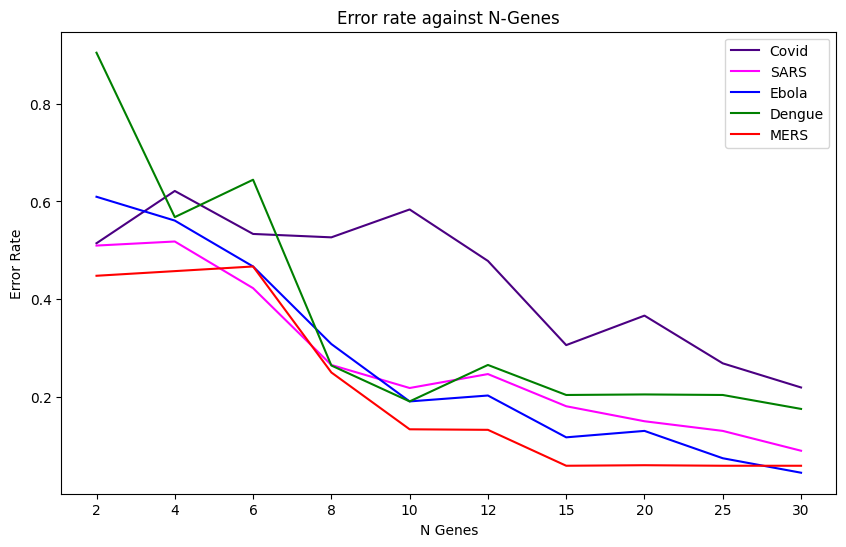

In [ ]:
err_arr = arr[:,1:]

cdict = {0: 'indigo',1: 'magenta', 2: 'blue', 3: 'green', 4: 'red'}
plt.figure(figsize = (10,6))
for i in range(err_arr.shape[1]):
  plt.plot(err_arr[:,i],c = cdict[i], label = new_xlabels[i])
lg = plt.legend()
xt = plt.xticks([0,1,2,3,4,5,6,7,8,9],new_ylabels)
titl = plt.title("Error rate against N-Genes")
yl = plt.xlabel("N Genes")
yl = plt.ylabel("Error Rate")

In [ ]:
  
  filename="pp5i_train.bestN.csv"
  data_arr = np.genfromtxt(filename,delimiter=',') 
  x_trainNT = data_arr
  y_trainNT = best_genes_cls

  clf = funcdict[maxCV]()

  if maxCV=='KNeighborsClassifier':
    clf = funcdict[C](3)
  elif maxCV=='ExtraTreesClassifier':
    clf = funcdict[C](n_estimators=350)
  elif maxCV=='MLP':
    clf = MLPClassifier(activation = 'relu', solver = 'sgd', hidden_layer_sizes= (25, 25),random_state = 1, max_iter=250)
  else:
    clf = funcdict[C]()
  
  clf.fit(x_trainNT,y_trainNT)

  from sklearn.model_selection import cross_val_score
  scores = cross_val_score(clf, x_trainNT, y_trainNT,cv=5)

  print("Best N         : ",maxNV)
  print("Best Clasifier : ",maxCV)
  print("Best Accuracy  : ",np.mean(scores))




Best N         :  30
Best Clasifier :  ExtraTreesClassifier
Best Accuracy  :  0.956043956043956


In [ ]:
filename="pp5i_test.bestN.csv"
x_testN = np.genfromtxt(filename,delimiter=',') 

num_out = clf.predict(x_testN)

test_class = le.inverse_transform(num_out.astype(int))
print("Test dataset predictions :\n",test_class)

Test dataset predictions :
 ['SARS' 'Dengue' 'Covid' 'Covid' 'Dengue' 'Covid' 'Covid' 'Covid' 'Dengue'
 'MERS' 'MERS' 'Covid' 'Covid' 'Covid' 'Covid' 'Covid' 'SARS' 'Covid'
 'Covid' 'Ebola' 'Ebola' 'Covid' 'Covid']
